# Summary

Simple measures of behavior, used in **Fig. 1D-F**.

---
# Setup


In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from popy.io_tools import load_behavior
from popy.behavior_data_tools import add_history_of_feedback
from popy.behavioral_analysis import fit_glm
from popy.plotting_tools import plot_strategy, plot_glm_weights


---
# Load data

In [2]:
behav = load_behavior()
behav

,monkey,session,trial_id,block_id,best_target,target,feedback,switch
0,ka,020622,0,0,2,2.0,1.0,NaN
1,ka,020622,1,0,2,2.0,1.0,0.0
2,ka,020622,2,0,2,2.0,0.0,0.0
3,ka,020622,3,0,2,2.0,1.0,0.0
4,ka,020622,4,0,2,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1566,po,240921,413,9,1,1.0,1.0,0.0
1567,po,240921,414,9,1,1.0,0.0,0.0
1568,po,240921,415,9,1,1.0,0.0,0.0
1569,po,240921,416,9,1,1.0,1.0,0.0


---
# Create figures

## Fig. 1D-E, Performance and shifting curves

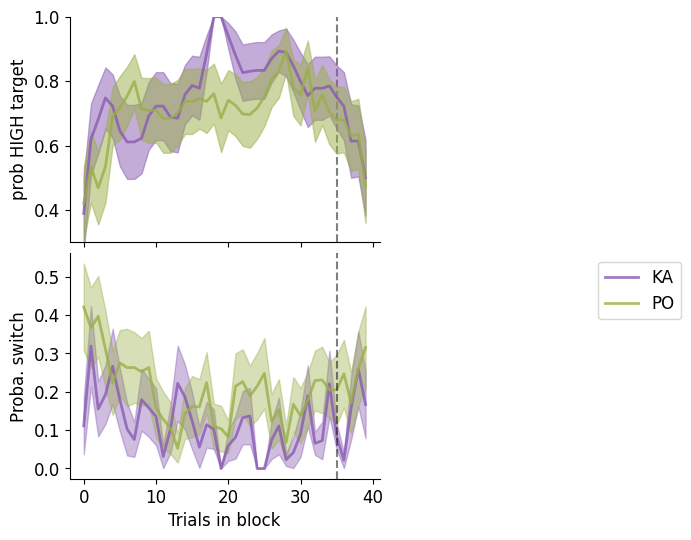

In [3]:
# plot strategy
fig, axs = plot_strategy(behav)

## Fig. 1F, History dependence of switching

In [4]:
behav = add_history_of_feedback(behav, one_column=False, num_trials=10)
behav

,monkey,session,trial_id,block_id,best_target,target,feedback,switch,if_best_target,model,...,T_1,T_2,T_3,T_4,T_5,T_6,T_7,T_8,T_9,T_10
0,ka,020622,0,0,2,2.0,1.0,NaN,True,recording,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ka,020622,1,0,2,2.0,1.0,0.0,True,recording,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ka,020622,2,0,2,2.0,0.0,0.0,True,recording,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ka,020622,3,0,2,2.0,1.0,0.0,True,recording,...,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ka,020622,4,0,2,2.0,0.0,0.0,True,recording,...,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1566,po,240921,413,9,1,1.0,1.0,0.0,True,recording,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1567,po,240921,414,9,1,1.0,0.0,0.0,True,recording,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1568,po,240921,415,9,1,1.0,0.0,0.0,True,recording,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1569,po,240921,416,9,1,1.0,1.0,0.0,True,recording,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Permutation 1/500 for monkey ka
Permutation 101/500 for monkey ka
Permutation 201/500 for monkey ka
Permutation 301/500 for monkey ka
Permutation 401/500 for monkey ka
Monkey: ka, CV accuracy: 0.86 +/- 0.07
Permutation 1/500 for monkey po
Permutation 101/500 for monkey po
Permutation 201/500 for monkey po
Permutation 301/500 for monkey po
Permutation 401/500 for monkey po
Monkey: po, CV accuracy: 0.81 +/- 0.04


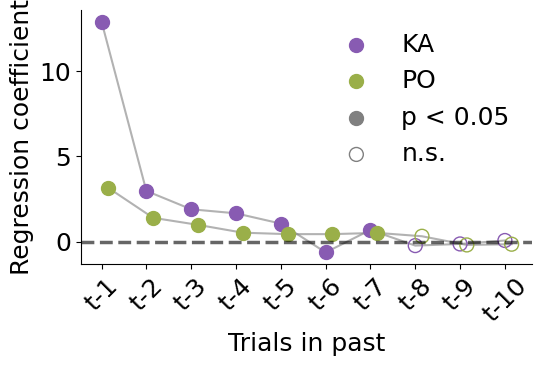

In [5]:
# setup GLM
predictors = ['R_1', 'R_2', 'R_3', 'R_4', 'R_5', 'R_6', 'R_7', 'R_8', 'R_9', 'R_10']
target = 'switch'

behav = behav.dropna(subset=[f'R_{i}' for i in range(1, 11)] + [target])  # drop rows with NaNs in predictors or target (trials at the beginning of sessions has no 'past' data)

# Fit the GLM
df_res = fit_glm(behav, target=target, predictors=predictors, n_permutations=500)

# Plot the GLM coefficients
plot_glm_weights(df_res)